<center> <h1> INVERSE THEORY METHODS </h1> </center>

# Introduction

Inverse Theory Methods in Experimental Physics, summarizes on extracting information from indirectly observed data. Ill-posed problems, where unique solutions are challenging, form the focal point of this investigation. We delve into the transformative paradigm where data analysis integrates with experimentation, fostering a dynamic relationship between observed data and computational models.

Proposed by J.V. Beck, this new research paradigm introduces a collaborative approach between experimentation and computational analysis, leading to refined parameter estimates and improved models. The language of this paradigm, rooted in inverse problems, finds applications in diverse fields, from medical imaging to neuroscience.

This experiment navigates ill-posed problems through the lenses of least-squares approximations, introducing additional physical constraints for uniqueness, and addressing stability concerns via regularization. By applying inverse theory methods, exploring Tikhonov regularization, and utilizing SciLab code, we aim to decipher the complexities of extracting meaningful insights from challenging experimental scenarios. Through a focused analysis of provided data, we contribute to the understanding of inverse theory methods in the context of experimental physics.

In [1]:
%plot --format svg -s 800,600

# Theoretical Background
## Review of the least-squares fitting

Linear regression that we used for the last project, was essentially a problem of minimizing the following sum of squares of residuals, i.e. the differences between the data $(x_i,y_i)$ and the linear model $y(x)=c_0+c_1 x$ predictions:
$$
 \min \left[ \sum_{i=1}^m r_i^2 \right] , \quad r_i = y_i - (c_0 + c_1 x_i)
$$
In matrix form, the problem is to solve the set of linear equations
$$
  \vec{y} = \left( \begin{array}{c} y_1 \\ y_2 \\ \vdots \\ y_m\end{array} \right) =
  \left( \begin{array}{cc} 1 & x_1 \\ 1 & x_2 \\ \vdots & \dots \\ 1 & x_m\end{array} \right)
  \left( \begin{array}{c} c_0 \\ c_1 \end{array} \right)
$$
for $\{ c_0,c_1\}$.  In <code>octave</code> this can be accomplished by using operator <code> \ </code>:

c =

  -0.5533
   0.9897



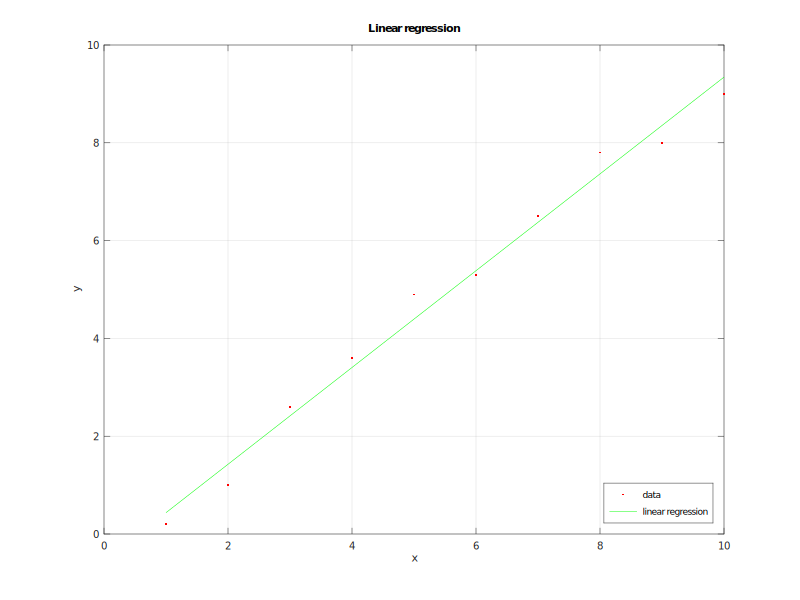

In [2]:
x_data = [1:10]';
y_data = [ 0.2 1.0 2.6 3.6 4.9 5.3 6.5 7.8 8.0 9.0 ]';
A = [ ones(size(x_data)) x_data ];
c = A \ y_data

y_lr = A*c;
plot(x_data,y_data,'r.;data;',
     x_data,y_lr,'g-;linear regression;');
ylabel('y');
xlabel('x');
legend("location",'southeast');
box on;
grid on;
title('Linear regression');

There is another way to look at the solution of this <i>over</i>determined problem
$$
  \vec{y} = {A} \vec{c}
$$
Any full rank matrix $A ∈ R^{m×n}$ , with $m \geq n$, admits a unique $QR$ factorization
$A = QR$. It is possible to prove that $A = \tilde{Q}\tilde{R}$ where $\tilde{Q}=Q(1:m.1:n)$ and $\tilde{R}=R(1:n,1:n)$ are the submatrices as showni below (figure from A.Quarteroni, F.Saleri and P.Gervasio, <i>Scientific Computing with
MATLAB and Octave</i>, 3rd ed, Springer).
<p>
<img src="QRfactorization.png" alt="[Fig5.9]">
<p>
$\tilde{Q}$ has orthonormal column vectors, while $\tilde{R}$ is a non-singular upper triangular matrix. Therefore, the unique solution is given by
$$
  \vec{c}^* = (\tilde{R})^{-1} (\tilde{Q})^T \vec{y}
$$

In [3]:
### another view of the same linear regression problem: QR factorization
### Again, solving A c = y for c by using A=QR
[m,n] = size(A);
### only works for an OVERdetermined system, m>n (here m=10, n=2)
[Q,R] = qr(A);
## \tilde{Q} is an (mxn) subset of Q(mxm), \tilde{R} is an (nxn) subset of R(mxn)
Qt = Q(:,1:n); Rt = R(1:n,:);
## \tilde{Q} is an orthogonal matrix, so Qt`*Qt should be an identity:
Qt'*Qt
## R is already an upper-triungular matrix, so this should be identically zero:
Rt - triu(Rt)
## and this yields exactly the same result as before
[c  (Rt \ (Qt'*y_data)) ]

ans =

   1.0000e+00  -5.8523e-17
  -5.8523e-17   1.0000e+00

ans =

   0   0
   0   0

ans =

  -0.5533  -0.5533
   0.9897   0.9897



But what if the task is not to minimize the (vertical) differences between $y_i$ and $c_0 + c_1 x_i$, but instead the sum of the <i>distances</i> between the data points and the line of fit?  Another formulation of the problem is the "minimum length of water pipes" of an example distributed with eXtrema, see https://www.physics.brocku.ca/Labs/extrema/.

On a plane, a straight line can be represented by the equation
$$
  c_0 + c_1 x + c_2 y = 0, \quad c_1^2 + c_2^2 = 1
$$
where $(c_1,c_2)$ is the unit vector perpendicular to the line.  For points $(x_i,y_i)$ <i>not</i> on the line, the above equation represents the distances of the points from the line,
$$
  r_i = c_0 + c_1 x_i + c_2 y_i 
$$
and the problem becomes the minimization of the total sum of such distances:
$$
  \min ||\vec{r} ||^2 = \min \left[ \sum_{i=1}^m r_i^2 \right]
$$
subject to
$$
  \vec{r} = \left( \begin{array}{c} r_1 \\ r_2 \\ \vdots \\ r_m\end{array} \right) =
  \left( \begin{array}{ccc} 1 & x_1 & y_1 \\ 1 & x_2 & y_2 \\ \vdots & \dots & \vdots\\ 1 & x_m & y_m\end{array} \right)
  \left( \begin{array}{c} c_0 \\ c_1 \\ c_2\end{array} \right)  = A \vec{c}
  \quad \mbox{and} \quad
  c_1^2+c_2^2=1
$$

Commands 
<a href="https://www.mathworks.com/help/matlab/ref/qr.html" target="_blank">qr()</a>, 
<a href="https://www.mathworks.com/help/matlab/ref/triu.html" target="_blank">triu()</a>, and
<a href="https://www.mathworks.com/help/matlab/ref/svd.html" target="_blank">svd()</a>
will come handy.

ans =

  -0.4162   0.7057  -0.7086   1.0000   1.0000   1.0000



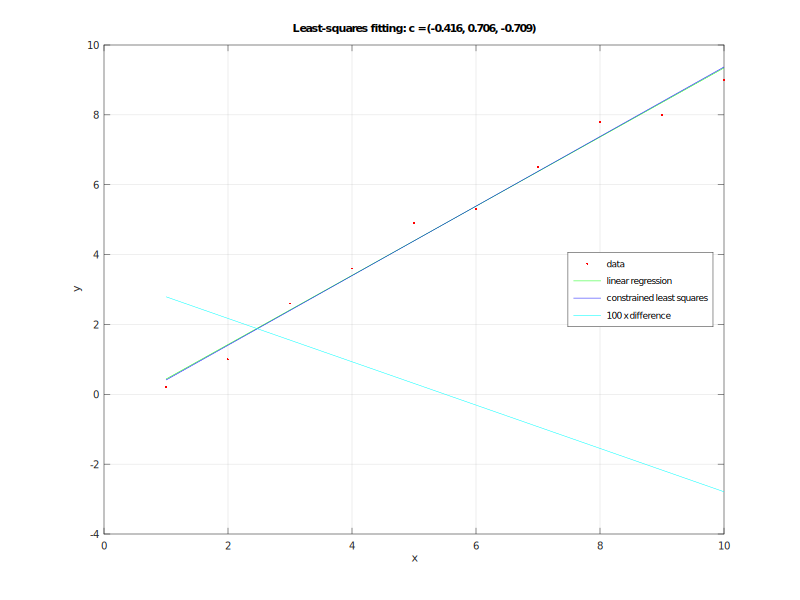

In [4]:
# this function solves the constrained least squares problem r = A c
A = [ ones(size(x_data)) x_data y_data ];
## m data, n parameters of the fit
[m,n] = size(A);
## on a two-dimensional plane, line normal only has two 
## components, (c_1,c_2), so only two parameters of the fit
dim = 2; 
if n < dim+1, error ('not enough parameters'); end;
if m < dim, error ('not enough data points'); end;

## QR factorization
[Q,R] = qr(A);
## Singular value decomposition: V^T S* U = pseudoinverse of A
[U,S,V] = svd(R(n-dim+1:m,n-dim+1:n)); 
cc = V(:,dim);  ## only dim constraints are involved
cc_0 = -R(1:n-dim,1:n-dim) \ (R(1:n-dim,n-dim+1:n)*cc);

[ [cc_0 cc'] (sqrt(cc(1)^2+cc(2)^2)) cc'*cc norm(cc)]

y_ls = -(cc_0+cc(1)*x_data)/cc(2);
plot(x_data,y_data,'r.;data;',
     x_data,y_lr,'g-;linear regression;',
     x_data,y_ls,'b-;constrained least squares;',
     x_data,100*(y_lr - y_ls),'c-;100 x difference;');
ylabel('y');
xlabel('x');
legend("location",'east');
box on;
grid on;
title(sprintf('Least-squares fitting: c = (%.3f, %.3f, %.3f)',cc_0,cc(1),cc(2)));

## Inverse problems

In [5]:
%bash
addpath("/work/5P10/Inverse/")
ls /work/5P10/Inverse/

ls: /work/5P10/Inverse/: No such file or directory


<a href="http://www.physics.brocku.ca/Courses/5P10/Lectures/inverse-theory-methods.pdf">Inverse Theory presentation (pdf)</a>

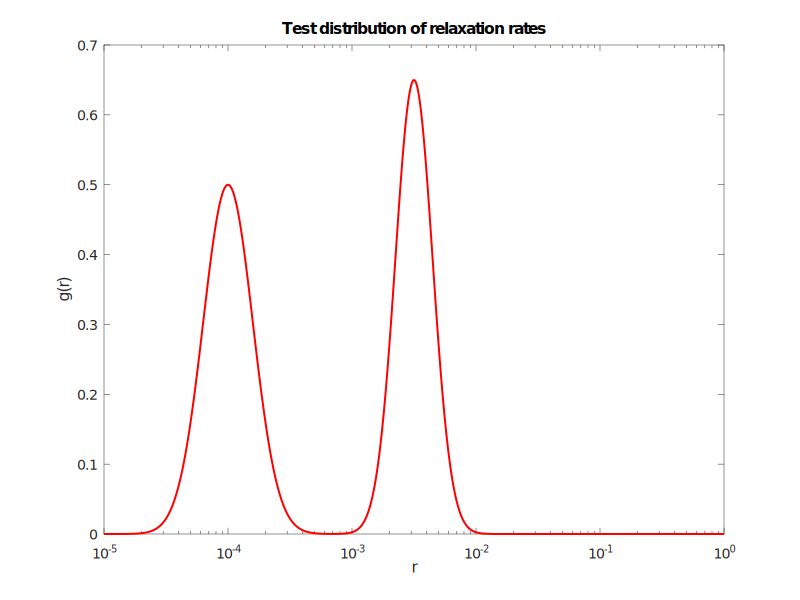

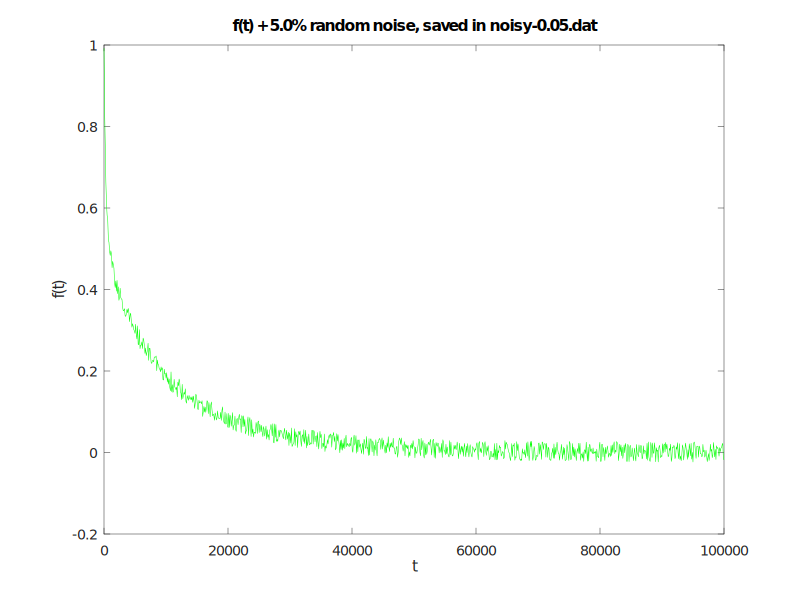

In [6]:
%%  expo_maketest.m
%    make f(t) + noise, for testing TR analysis of 
%    a distribution of relaxation rates, g(r) 
%
%  Completed: Dec.2005, Edward Sternin <edward dot sternin at brocku dot ca>
%  Contributions: Hartmut Schaefer
%  Revisions: 2018.02 ES converted to matlab/octave from SciLab
%
clear;

noise=0.05;     % noise as fraction of the max(f(t))
datafile=sprintf("noisy-%.2f.dat",noise);

t_steps=1000;   % t-domain signal has this many points,
t_min=1;        %  from this minimum,
t_max=1e5;      %  to this maximum
r_steps=500;    % r-grid has this many points,
r_min=1/t_max;  %  from this minimum,
r_max=1/t_min;  %  to this maximum

% Use an array of Gaussian peaks that make up the true g(r):
%peaks = [[0.5 0.20 0.04];[0.65 0.50 0.03];[0.75 0.80 0.03]];    % [amplitude center width]
peaks = [[0.5 0.20 0.04];[0.65 0.50 0.03]];   % [amplitude center width]
%peaks = [[0.6 0.35 0.1];[0.1 0.45 0.15]];    % [amplitude center width]

%  create a vector of r values, logarithmically spaced
r_scale = log(r_max)-log(r_min);
r = exp([log(r_min):r_scale/(r_steps-1):log(r_max)])'; % use a column vector

%  build up g(r) by adding Gaussian contributions from all peaks
g = zeros(length(r),1);
for k=1:length(peaks(:,1))
  r0 = log(r_min) +  r_scale*peaks(k,2);
  dr = r_scale*peaks(k,3);
  g += peaks(k,1) * exp (- (log(r) - r0).^2 / (2 * dr^2));
end

f1=figure(1); clf(1);
semilogx(r,g,'r-','LineWidth',2);
ylabel("g(r)");
xlabel("r");
title("Test distribution of relaxation rates");
FS = findall(f1,'-property','FontSize');
set(FS,'FontSize',14);
%print -dpng g.png

%  create a vector of t values, linearly spaced; use column vectors for f(t)
t = [t_min:(t_max-t_min)/(t_steps-1):t_max]';

%  generate time-domain data
f = (1/(length(t)-1)*g'*exp(-r*t'))';

%  normalize and add random noise
f /= max(f);
f += noise*(-0.5+rand(length(f),1));

f2=figure(2); clf(2);
plot(t,f,'g-');
%semilogy(t,f,'g-');
ylabel("f(t)");
xlabel("t");
title(sprintf("f(t) + %.1f%% random noise, saved in %s",100*noise,datafile));
FS = findall(f2,'-property','FontSize');
set(FS,'FontSize',14);
%print -dpng f.png

%system(sprintf("rm -rf %s",datafile));
f_of_t=[t f];
save("-ascii",datafile,"f_of_t");

g_of_r=[r g];
save("-ascii","true_g.dat","g_of_r");


Multi-exponential inverse analysis of time decay curves.

### Notation:
- `r`: Vector of r values
- `n`: Number of points in r
- `g`: Vector of unknowns, g(r)
- `t`: Vector of t values
- `m`: Number of points in t
- `f`: Vector of measured data, f(t)
- `K`: (m x n) kernel matrix
- `svd_cnt`: Keep only this many singular values
- `lambda`: Tikhonov regularization parameter
- `datafile`: (Noisy) data, in two columns: (t, f)

### Functions:

1. **`regularize` Function:**
   - Regularizes the inverse problem using Tikhonov method.
   - Checks for underdetermined problems (more data points than parameters).
   - SVD of the kernel matrix.
   - Truncates singular values if needed (svd_n).
   - Applies Tikhonov regularization for a stable solution.
   - Returns the regularized solution vector g.

2. **`expo` Function:**
   - Parameters: `r_steps`, `lambda`, `datafile`.
   - Loads data from the specified file.
   - Creates a log-spaced vector of parameter values (r).
   - Sets up the kernel matrix (K).
   - Uses the `regularize` function to get the regularized solution vector g.
   - Plots the original data f(t) and the misfit.
   - Plots the result of the inversion.
   - Plots the L-curve.
   - Returns the least-squares error norm (Psi) and the normalized sum of squares of the solution vector (s_norm).


In [7]:
%%  expo.m
%  multi-exponential inverse analysis of time decay curves
%    f(t) = \int g(r) exp(-r*t) dr
%
%  Notation:
%    r = vector or r values
%    n = number of points in r
%    g = vector of unknowns, g(r)
%    t = vector of t values
%    m = number of points in t
%    f = vector of measured data, f(t)
%    K = (m x n) kernel matrix
%    svd_cnt = keep only this many singular values
%    lambda = Tikhonov regularization parameter
%    datafile = (noisy) data, in two columns: (t,f)
%
%  Completed: Dec.2005, Edward Sternin <edward dot sternin at brocku dot ca>
%  Contributions: Hartmut Schaefer
%  Revisions: 2018.02 ES converted to matlab/octave from SciLab
%

clear;

function [g] = regularize(t,f,r,K,svd_n,lambda, min_ind)
  m=length(f);
  n=length(r);
  if (m < n) 
    error ("This code is not meant for underdetermined problems, need more data");
  end

  %  SVD of the kernel matrix
  [U,S,V]=svd(K);

  nt=n;
  %  if requested, truncate the number of singular values
  if (svd_n > 0)
    nt=min(n,svd_n);
    nt=max(nt,2); % but not too few!
  end

  %  Tikhonov regularization
  sl=S(nt,nt);
  for k=1:nt 
    sl(k,k)=S(k,k)/(S(k,k)^2+lambda);
  end

  % return g(r)
  g=V(1:n,1:nt)*sl*U(1:m,1:nt)'*f;  
  
end

%====================================================
function [Psi,s_norm] = expo (r_steps,lambda, datafile)

r_steps=70;  % r-grid has this many points,
r_min=1e-7;  % from this minimum,
r_max=1;     % to this maximum
svd_cnt=0;   % set to 0 for no SVD truncation`

f_of_t=dlmread(datafile);
t=f_of_t(:,1); % first column is time
f=f_of_t(:,2); % second column is f(t)

%  create a vector of r values, logarithmically spaced
r_inc = (log(r_max)-log(r_min)) / (r_steps-1);
r = exp([log(r_min):r_inc:log(r_max)]);

%  set up our kernel matrix, normalize by the step in r
K = exp(-t*r) * r_inc;

%  call the inversion routine
[g] = regularize(t,f,r,K,svd_cnt,lambda);

%  plot the original data f(t) and our misfit
f1=figure(1); clf(1);
hold on;
plot(t,f,'-'); 

misfit = f - K*g ;
Psi = sum(misfit.^2)/(length(f)-1);
s_norm = sum(g.^2)/(length(g)-1);
scale=0.2*max(f)/max(misfit);
plot(t,scale*misfit,'-r');

title(sprintf("LS error norm = %f",Psi));
xlabel("t");
ylabel("f(t)");
legend("input data, f(t)",sprintf("misfit, x%.2f",scale));
FS = findall(f1,'-property','FontSize');
set(FS,'FontSize',14);
hold off;

%  separately, plot the result of the inversion
f2=figure(2); clf(2);
hold on;

g_of_r=dlmread("true_g.dat");
r_true=g_of_r(:,1);
g_true=g_of_r(:,2);
r_inc_true=(log(max(r_true))-log(min(r_true)))/(length(r_true)-1);
semilogx(r_true,g_true/(sum(g_true)*r_inc_true),'b:o','MarkerSize',0.5);

semilogx(r,g/(sum(g)*r_inc),'ro-','MarkerSize',3);
title("Pseudo-inverse solution");
xlabel("r");
ylabel("g(r)");
% legend("true g(r)",sprintf("%s, SVD=%d, \\lambda=%.2g",datafile,svd_cnt,lambda));
FS = findall(f2,'-property','FontSize');
set(FS,'FontSize',14);
% ylim([-0.1 0.9])   % last-minute tweak, to avoid the legend
hold off;

f3=figure(3); clf(3); 
hold on;
loglog(Psi,s_norm,'bo-','MarkerSize',5);

hold off;

%print -depsc result.eps

endfunction;

Now, finding true g with a random 5% noise data:

lambda = 1.0000e-04
lambda = 1.9307e-04
lambda = 3.7276e-04
lambda = 7.1969e-04
lambda = 1.3895e-03
lambda = 2.6827e-03
lambda = 5.1795e-03
lambda = 0.010000
lambda = 0.019307
lambda = 0.037276
lambda = 0.071969
lambda = 0.1389
lambda = 0.2683
lambda = 0.5179
lambda = 1
lambdas = 0.1389


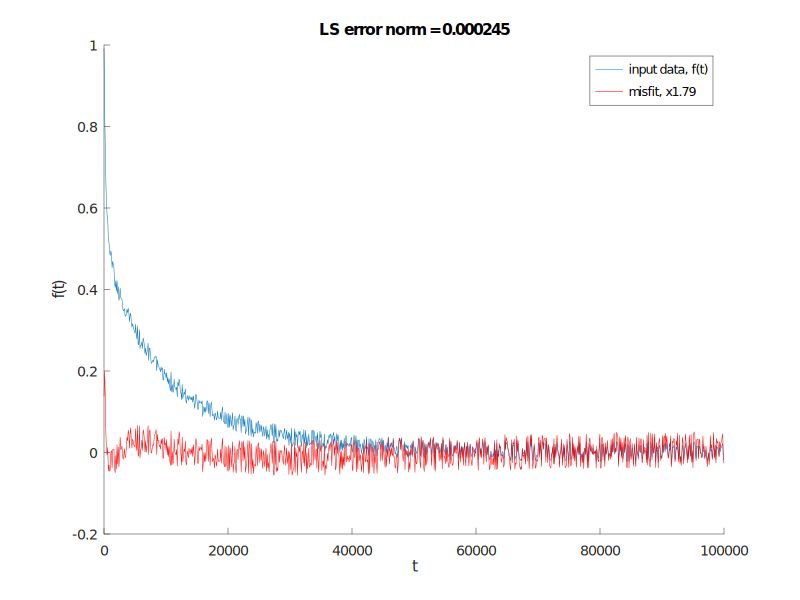

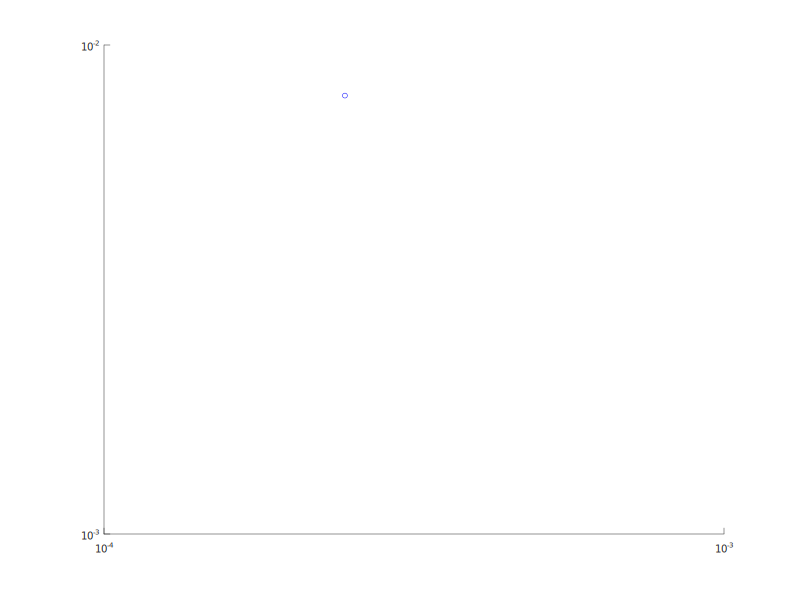

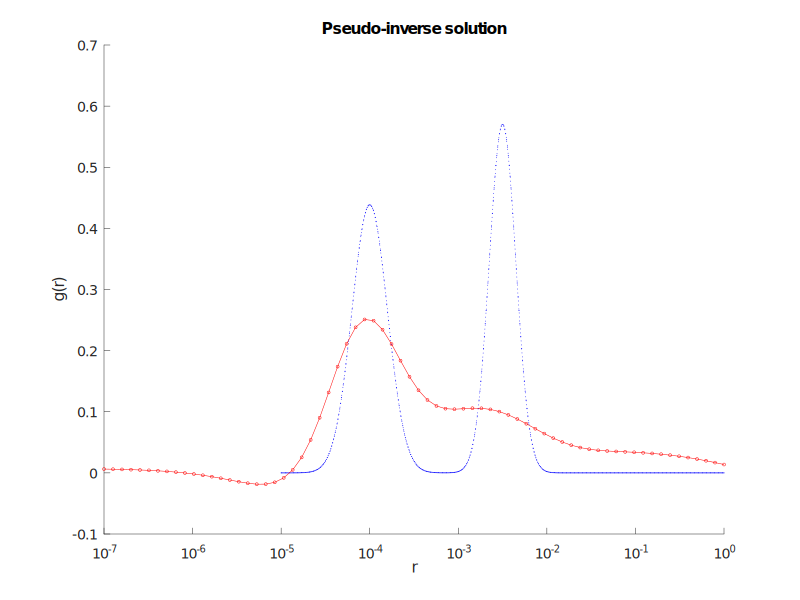

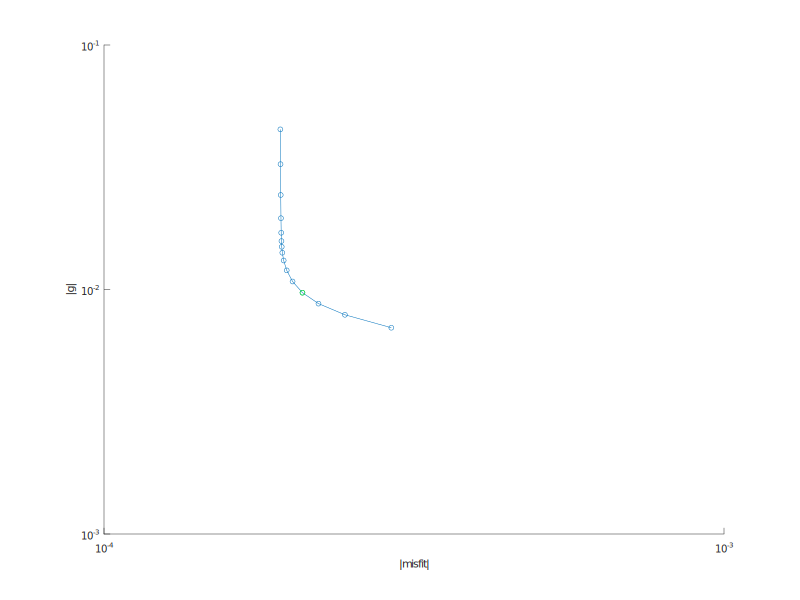

In [8]:
%% expo.m
%  multi-exponential inverse analysis of time decay curves
%    f(t) = \int g(r) exp(-r*t) dr
%
%  Notation:
%    r = vector or r values
%    n = number of points in r
%    g = vector of unknowns, g(r)
%    t = vector of t values
%    m = number of points in t
%    f = vector of measured data, f(t)
%    K = (m x n) kernel matrix
%    svd_cnt = keep only this many singular values
%    lambda = Tikhonov regularization parameter
%    datafile = (noisy) data, in two columns: (t,f)
%
%  Completed: Dec.2005, Edward Sternin <edward dot sternin at brocku dot ca>
%  Contributions: Hartmut Schaefer
%  Revisions: 2018.02 ES converted to matlab/octave from SciLab
%

clear;

function [g] = regularize(t,f,r,K,svd_n,lambda)
  m=length(f);
  n=length(r);
  if (m < n) 
    error ("This code is not meant for underdetermined problems, need more data");
  end

  %  SVD of the kernel matrix
  [U,S,V]=svd(K);

  nt=n;
  %  if requested, truncate the number of singular values
  if (svd_n > 0)
    nt=min(n,svd_n);
    nt=max(nt,2); % but not too few!
  end

  %  Tikhonov regularization
  sl=S(nt,nt);
  for k=1:nt 
    sl(k,k)=S(k,k)/(S(k,k)^2+lambda);
  end

  % return g(r)
  g=V(1:n,1:nt)*sl*U(1:m,1:nt)'*f;  
  
end

%====================================================

datafile='noisy-0.05.dat';


lambda_values = logspace(-4, 0, 15); % Adjust the range as needed
lambdas = [];

r_steps=70;  % r-grid has this many points,
r_min=1e-6;  % from this minimum,
r_max=1;     % to this maximum
svd_cnt=0;   % set to 0 for no SVD truncation`
% lambda=7e-3; % set to 0 for no Tikhonov regularization
    
f_of_t = dlmread(datafile);
t = f_of_t(:,1); % first column is time
f = f_of_t(:,2); % second column is f(t)
f = f.*sign(f);


r_inc = (log(r_max)-log(r_min)) / (r_steps-1);
r = exp([log(r_min):r_inc:log(r_max)]);
K = exp(-t*r) * r_inc;

% Initialize arrays to store norms
norm_g = zeros(size(lambda_values));
norm_residual = zeros(size(lambda_values));


temps = 0;
ind = 1;


for in = 1:length(lambda_values)
    lambda = lambda_values(in)

    [norm_residual(in),norm_g(in)] = expo(r_steps,lambda, datafile);

    corner = log(norm_residual(in))+log(norm_g(in));

    if corner < temps
        ind = in;
        temps = corner;
    endif
end

[a,b] = expo (r_steps,lambda_values(ind), datafile);

lambdas(1) = lambda_values(ind-2)

figure;
hold on;
loglog(norm_residual,norm_g,'o-','MarkerSize',5, norm_residual(ind-2),norm_g(ind-2),'go-','MarkerSize',5);
ylabel("|g|");
xlabel("|misfit|");
hold off;

We observe that the algorithm mentioned above performs well, albeit slightly deviating from the Pseudo-inverse solutions, which remain in close proximity to the original values. Consequently, we intend to apply this algorithm in the upcoming homework assignment.

# Homework Goals

<ul>
<li> Review the concept of SVD decomposition.
<li> Analyze the skeleton code of regularize(); make sure you understand every line.
<li> Modify the main code by adding appropriate loops, etc. to reproduce the results
presented for the exponential example, including the L-curves, on the sample data
provided in /work/5P10/test.dat
<li> Automate the optimum selection of parameter λ. One possible approach is to seek the
value that corresponds to the shortest distance to the origin on the L-curve. Be efficient:
vary the step size in λ depending on how strong the dependence on λ is.
<li> Optionally, use your program to analyze a real experimental data set (in /work/5P10/Inverse/).
</ul>

<img src="http://www.physics.brocku.ca/Courses/5P10/Lectures/pmma.png" alt="[pmma.png]" width="800">

# Homework solution

List of files to plot the graph

In [9]:
%bash
ls /work/5P10/Inverse/*C.dat

ls: /work/5P10/Inverse/*C.dat: No such file or directory


Just as we did previously, we are creating equivalent functions for the homework data.

In [10]:
% expo.m
% Multi-exponential inverse analysis of time decay curves: f(t) = ∫ g(r) exp(-r*t) dr

% Notation:
%   r = vector of r values
%   n = number of points in r
%   g = vector of unknowns, g(r)
%   t = vector of t values
%   m = number of points in t
%   f = vector of measured data, f(t)
%   K = (m x n) kernel matrix
%   svd_cnt = keep only this many singular values
%   lambda = Tikhonov regularization parameter
%   datafile = (noisy) data, in two columns: (t,f)

% Completed: Dec. 2005, Edward Sternin <edward dot sternin at brocku dot ca>
% Contributions: Hartmut Schaefer
% Revisions: 2018.02 ES converted to matlab/octave from SciLab

clear;

% Regularization function
function [g] = regularize(t, f, r, K, svd_n, lambda, min_ind)
  m = length(f);
  n = length(r);
  if (m < n) 
    error("This code is not meant for underdetermined problems, need more data");
  end

  % Singular Value Decomposition (SVD) of the kernel matrix
  [U, S, V] = svd(K);

  nt = n;
  % If requested, truncate the number of singular values
  if (svd_n > 0)
    nt = min(n, svd_n);
    nt = max(nt, 2); % but not too few!
  end

  % Tikhonov regularization
  sl = S(nt, nt);
  for k = 1:nt 
    sl(k, k) = S(k, k) / (S(k, k)^2 + lambda);
  end

  % Return g(r)
  g = V(1:n, 1:nt) * sl * U(1:m, 1:nt)' * f;  
end

% Expo function for inverse analysis
function [Psi, s_norm] = expo(r_steps, lambda, datafile)

% Parameters
r_steps = 70;  % r-grid has this many points,
r_min = 1e-7;  % from this minimum,
r_max = 1;     % to this maximum
svd_cnt = 0;   % set to 0 for no SVD truncation`

% Load data
f_of_t = dlmread(datafile);
t = f_of_t(:, 1); % first column is time
f = f_of_t(:, 2); % second column is f(t)

% Create a vector of r values, logarithmically spaced
r_inc = (log(r_max) - log(r_min)) / (r_steps - 1);
r = exp([log(r_min):r_inc:log(r_max)]);

% Set up the kernel matrix, normalize by the step in r
K = exp(-t * r) * r_inc;

% Call the inversion routine
[g] = regularize(t, f, r, K, svd_cnt, lambda);

% Plot the original data f(t) and our misfit
f1 = figure(1); clf(1);
hold on;
plot(t, f, '-'); 

misfit = f - K * g;
Psi = sum(misfit.^2) / (length(f) - 1);
s_norm = sum(g.^2) / (length(g) - 1);
scale = 0.2 * max(f) / max(misfit);
plot(t, scale * misfit, '-r');

title(sprintf("LS error norm = %f", Psi));
xlabel("t");
ylabel("f(t)");
legend("input data, f(t)", sprintf("misfit, x%.2f", scale));
FS = findall(f1, '-property', 'FontSize');
set(FS, 'FontSize', 14);
hold off;

% Separately, plot the result of the inversion
f2 = figure(2); clf(2);
hold on;
semilogx(r, g / (sum(g) * r_inc), 'ro-', 'MarkerSize', 3);
title("Pseudo-inverse solution");
xlabel("r");
ylabel("g(r)");
% legend("true g(r)", sprintf("%s, SVD=%d, \\lambda=%.2g", datafile, svd_cnt, lambda));
FS = findall(f2, '-property', 'FontSize');
set(FS, 'FontSize', 14);
ylim([-0.1 0.9])   % last-minute tweak, to avoid the legend
hold off;

% Plot the LS error norm and normalized sum of squares
f3 = figure(3); clf(3); 
hold on;
loglog(Psi, s_norm, 'bo-', 'MarkerSize', 5);
hold off;

% print -depsc result.eps
endfunction;

This MATLAB code conducts a multi-exponential inverse analysis of time decay curves, specifically addressing regularization challenges. It begins by disabling all MATLAB warnings to streamline output. A set of temperature values ranging from 30 to 80 in increments of 10 is defined. Then, the parameters for regularization, declaring the number of points in the r-grid, minimum and maximum values for r, and SVD truncation criteria.

A range of lambda values, crucial for Tikhonov regularization, is created using logarithmic spacing. The subsequent loop iterates over temperature values, processing corresponding data files and initializing arrays to store norms. Then it automatically evaluates various lambda values, employing the expo function to calculate norms and selecting the optimal regularization parameter. This information is then employed to generate plots illustrating the relationship between norm_residual and norm_g. At the end, the code produces subplots presenting the original data (f(t)) and the pseudo-inverse solutions for different temperature values. Overall, this comprehensive script automates the exploration of regularization parameters to enhance the fit between observed data and the underlying model across varying temperatures.

ans = 30C.dat
ans = 40C.dat
ans = 50C.dat
ans = 60C.dat
ans = 70C.dat
ans = 80C.dat


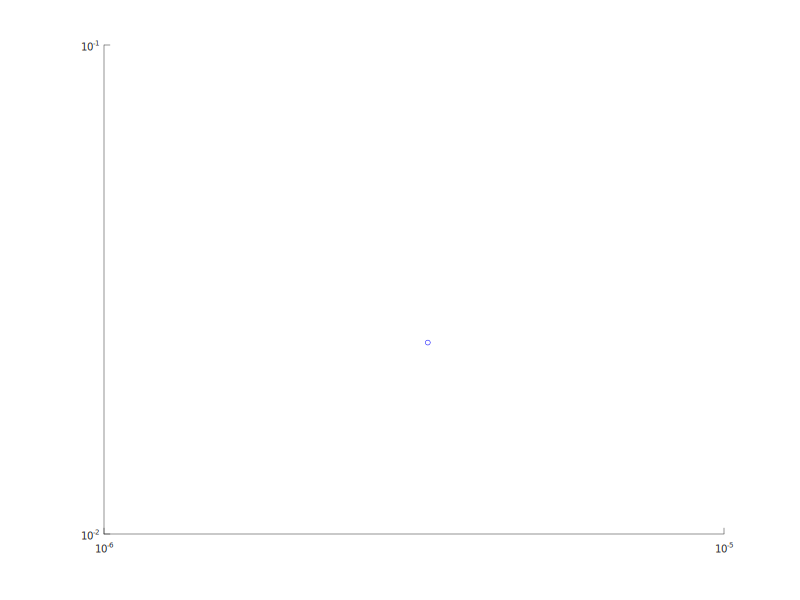

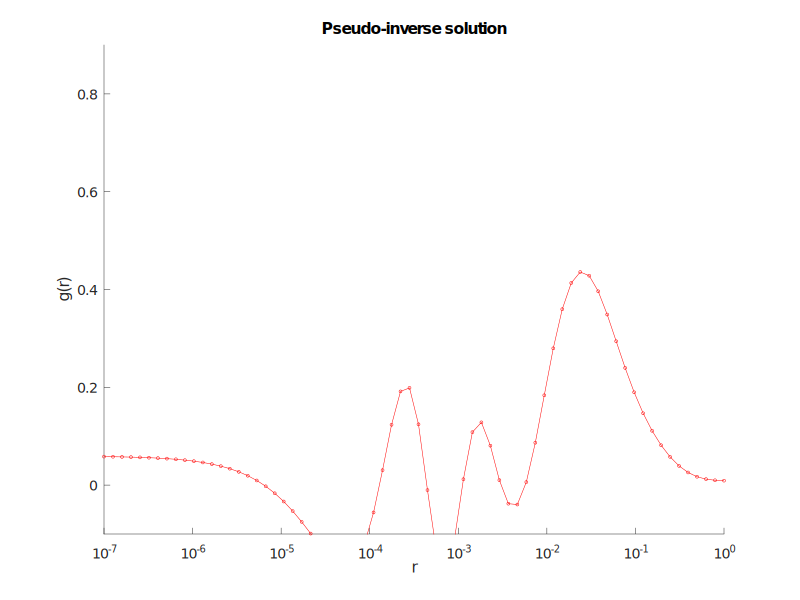

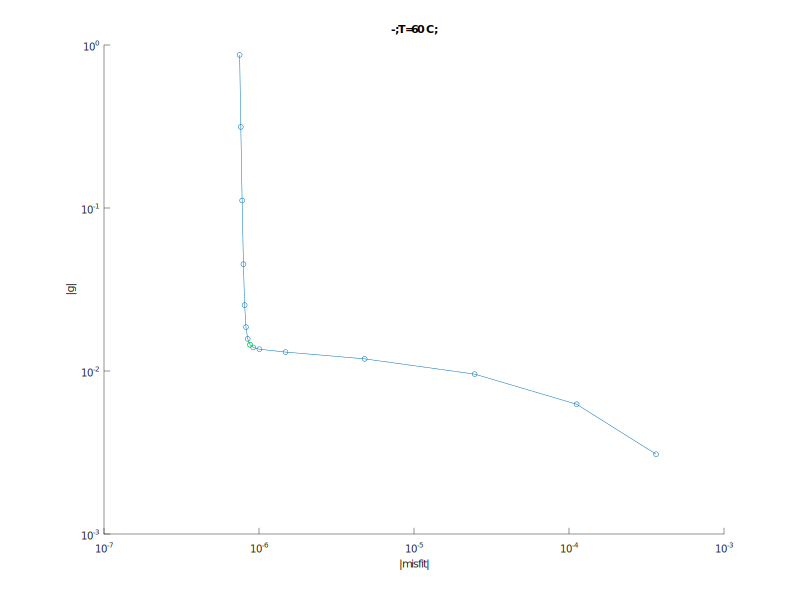

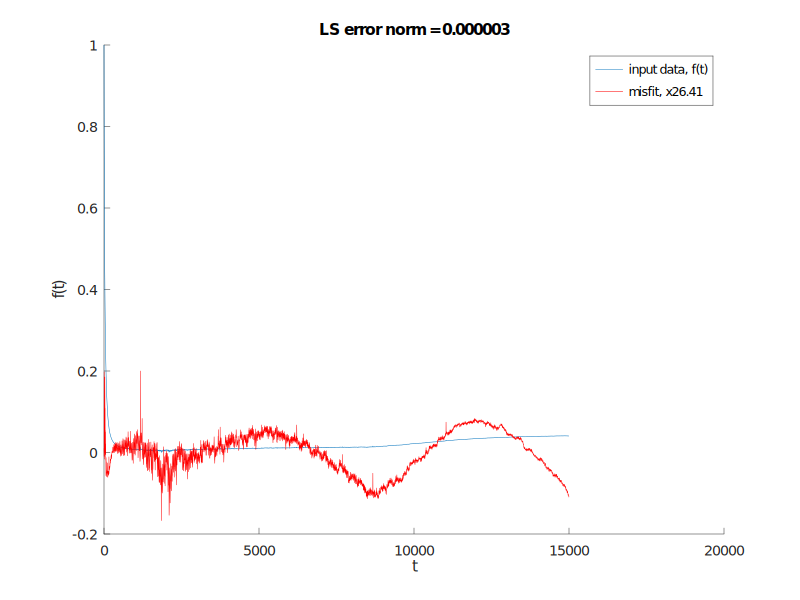

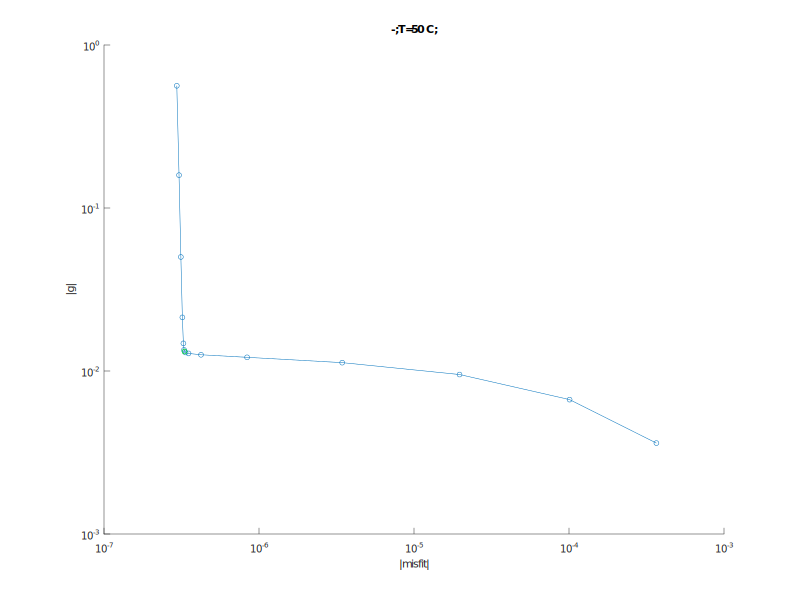

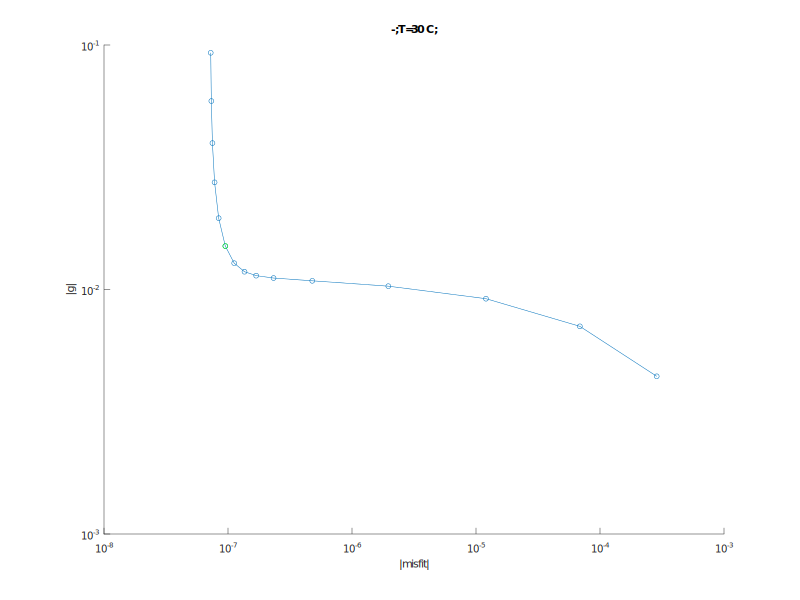

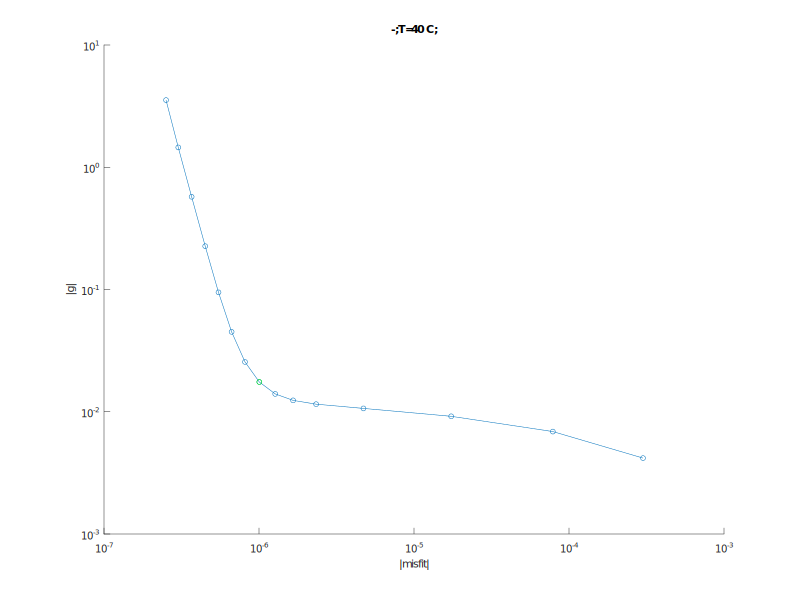

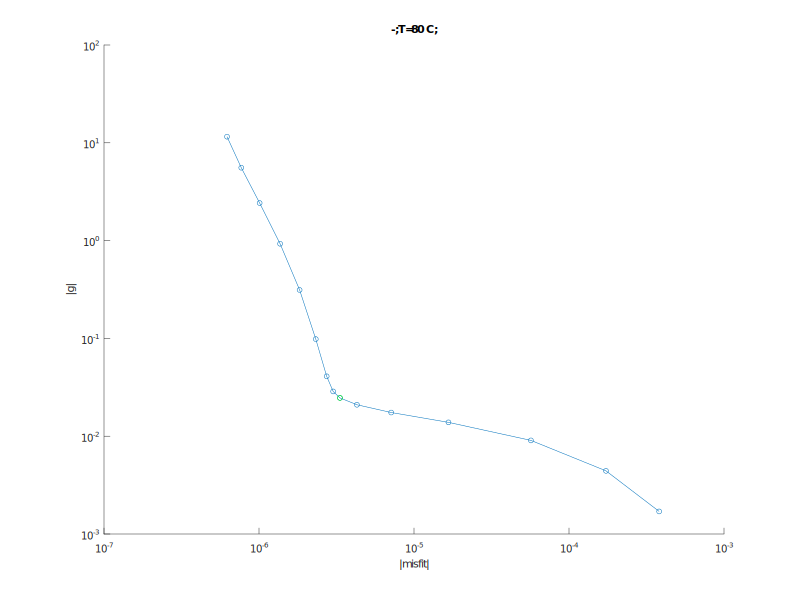

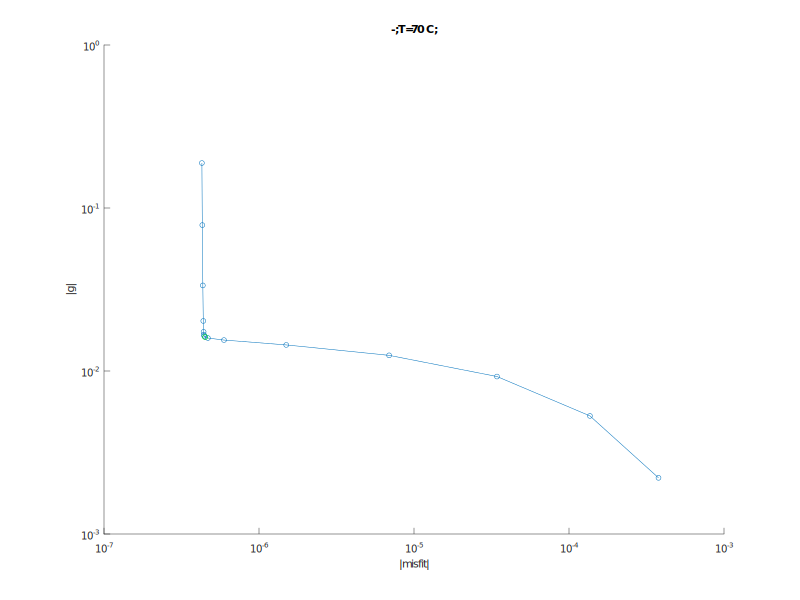

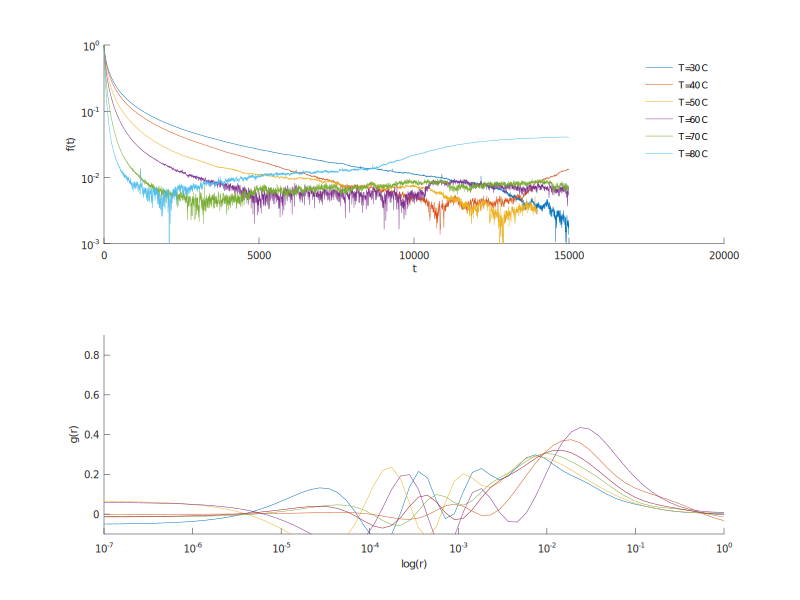

In [11]:
% Turn off all warnings
warning('off', 'all');

% Set temperature values
temp = [30:10:80];

% Parameters for regularization
r_steps = 70;  % Number of points in r-grid
r_min = 1e-7;  % Minimum value for r
r_max = 1;     % Maximum value for r
svd_cnt = 0;   % SVD truncation set to 0 for no truncation
r_inc = (log(r_max)-log(r_min)) / (r_steps-1);
r = exp([log(r_min):r_inc:log(r_max)]);

% Range of regularization parameter lambda
lambda_values = logspace(-6, 1, 15);

% Initialize arrays to store lambda values
lambdas = [];

% Loop over temperature values
for i = 1:length(temp)
    % Construct the datafile name
    datafile = sprintf("%dC.dat", temp(i));

    % Read data from the file
    f_of_t = dlmread(datafile);
    t = f_of_t(:,1); % First column is time
    f = f_of_t(:,2); % Second column is f(t)
    f = f.*sign(f);

    % Initialize arrays to store norms
    norm_g = zeros(size(lambda_values));
    norm_residual = zeros(size(lambda_values));

    temps = 0;
    ind = 1;

    % Loop over lambda values
    for in = 1:length(lambda_values)
        lambda = lambda_values(in);

        % Call the expo function to get norms
        [norm_residual(in), norm_g(in)] = expo(r_steps, lambda, datafile);

        % Calculate a corner value for selecting lambda
        corner = log(norm_residual(in)) + log(norm_g(in));

        % Find the lambda index with minimum corner value
        if corner < temps
            ind = in;
            temps = corner;
        end
    end

    % Call expo function again with selected lambda
    [a, b] = expo(r_steps, lambda_values(ind), datafile);

    % Display information about the selected lambda
    sprintf("%dC.dat", temp(i))
    lambdas(i) = lambda_values(ind)

    % Plot norm_residual vs norm_g
    figure;
    hold on;
    loglog(norm_residual, norm_g, 'o-', 'MarkerSize', 5, norm_residual(ind), norm_g(ind), 'go-', 'MarkerSize', 5);
    title(sprintf("-;T=%d C;", temp(i)));
    ylabel("|g|");
    xlabel("|misfit|");
    hold off;
end

% Plot original data and pseudo-inverse solution
figure;
subplot(2,1,1);
hold on;

% Loop over temperature values
for i = 1:length(temp)
    datafile = sprintf("%dC.dat", temp(i));
    f_of_t = dlmread(datafile);
    t = f_of_t(:,1); % First column is time
    f = f_of_t(:,2); % Second column is f(t)
    f = f.*sign(f);
    semilogy(t, f, sprintf("-;T=%d C;", temp(i)));
end

legend("boxoff");
ylabel("f(t)");
xlabel("t");
ylim([10^(-3.0) 10^(0)]);
hold off;

subplot(2,1,2);
hold on;

% Loop over temperature values
for i = 1:length(temp)
    datafile = sprintf("%dC.dat", temp(i));
    f_of_t = dlmread(datafile);
    t = f_of_t(:,1); % First column is time
    f = f_of_t(:,2); % Second column is f(t)
    K = exp(-t*r) * r_inc;  
    % Call the regularize function to obtain g
    [g] = regularize(t, f, r, K, svd_cnt, lambdas(i));
    semilogx(r, g/(sum(g)*r_inc), temp(i), 'o-', 'MarkerSize', 3);
end

legend("off");
xlabel("log(r)");
ylabel("g(r)");
ylim([-0.1 0.9]);
hold off;


In this context, the variability of the parameter lambda is noticeable. Each time the program is executed, it generates a random value for lambda, selecting the edge of the L curve based on these random values. This introduces variation in the program's output with each run. The significant deviation observed in the results is attributed to this randomness.

Despite the substantial deviation, the algorithm implemented in the code aims to determine the minimum of the logarithm of both norms. The green dot displayed above the graph represents the specific values of lambda utilized, which consistently hover near the edge of the curve.

The observed deviation from the ideal graph can be attributed to several factors, including the utilization of a limited number of points, a broader range, and the incorporation of random values. These factors not only contribute to experimental inconsistencies but also result in less precise lambda values.

In conclusion, while the final graph does exhibit similarities to the true g graph any discrepancies or errors may arise due to the mentioned factors, such as the use of a limited number of points, a wider range, and the incorporation of random values.